# Quality of Life

To determine the "best" neighborhood, we created this sub-metric which is based on how accessible a neighborhood is. Essentially, the more walkable a neighborhood is, the more its "Quality of Life" score increases which is out of 40.

The code below displays the dataset we will be analyzing to decide what neighborhood is the most walkable.

In [271]:
import pandas as pd

pt = pd.read_csv("publictransport.csv")
pt.head(20)

,_id,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
0,1,Allegheny Center,3,933,2.23,4.14,19.7,0,0,NaN,386,27.7%,9.8%,16.8%,0.0%,0.0%,0.0%,43.8%,0.0%,1.8%
1,2,Allegheny West,3,462,1.47,4.87,34.5,0,0,G,151,23.2%,20.5%,15.9%,14.6%,0.0%,0.0%,25.8%,0.0%,0.0%
2,3,Allentown,6,"2,500",1.65,12.33,41.8,12,474,NaN,824,47.0%,10.9%,38.0%,0.0%,0.8%,0.0%,0.0%,1.5%,1.8%
3,4,Arlington,7,"1,869",0.86,10.73,22.8,13,428,NaN,673,74.0%,7.3%,13.5%,0.0%,0.0%,0.0%,1.9%,0.9%,2.4%
4,5,Arlington Heights,7,244,0.00,1.09,8.2,0,0,NaN,72,11.1%,0.0%,88.9%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
5,6,Banksville,5,"4,144",5.99,18.33,18.9,4,322,NaN,"2,506",81.5%,5.9%,11.7%,0.0%,0.0%,0.0%,0.7%,0.2%,0.0%
6,7,Bedford Dwellings,15,"1,202",0.97,4.48,25.1,3,234,NaN,305,36.7%,16.7%,33.8%,0.0%,0.0%,0.0%,12.8%,0.0%,0.0%
7,8,Beechview,5,"7,974",6.42,30.75,21.1,39,"2,494","BB, T","3,909",55.1%,15.3%,21.2%,0.0%,0.0%,0.6%,5.3%,0.0%,2.6%
8,9,Beltzhoover,6,"1,925",3.32,17.26,41.0,16,595,NaN,706,45.8%,8.1%,43.1%,0.0%,0.0%,0.0%,0.0%,0.0%,3.1%
9,10,Bloomfield,12,"8,442",3.80,31.74,45.2,3,131,"H, R","5,117",42.0%,9.3%,20.0%,0.0%,0.8%,6.4%,18.8%,0.0%,2.6%


The code below singles out and displays the the column we will be focusing on which is the percent of people who walk to work in each neighborhood.

In [262]:
(pt[['Neighborhood', 'Commute to Work: Walk (2010)']].head(20))

,Neighborhood,Commute to Work: Walk (2010)
0,Allegheny Center,43.8%
1,Allegheny West,25.8%
2,Allentown,0.0%
3,Arlington,1.9%
4,Arlington Heights,0.0%
5,Banksville,0.7%
6,Bedford Dwellings,12.8%
7,Beechview,5.3%
8,Beltzhoover,0.0%
9,Bloomfield,18.8%


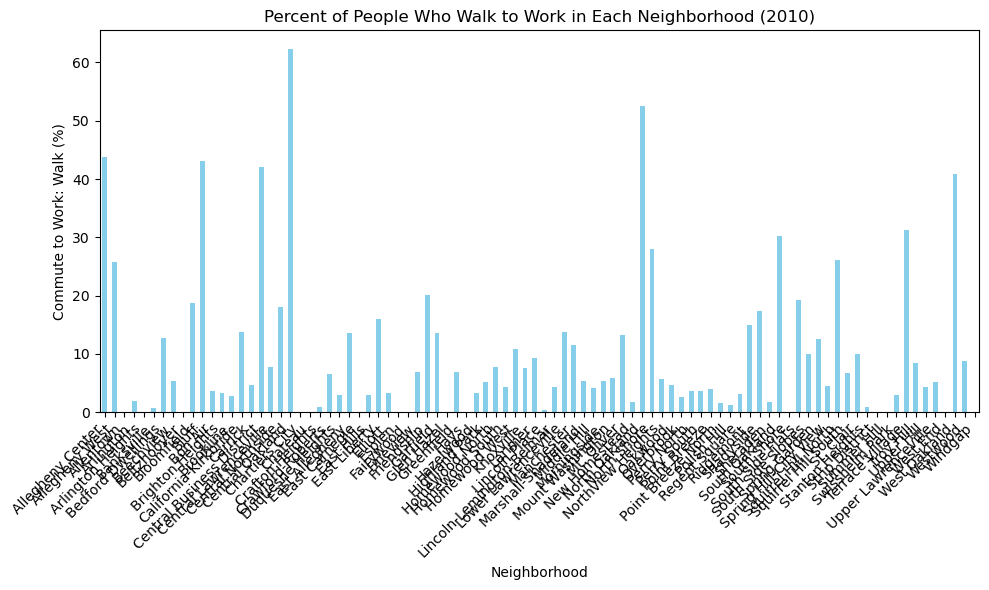

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
pt = pd.read_csv("publictransport.csv")

# Remove the '%' symbol and convert the 'Commute to Work: Walk (2010)' column to numeric
pt['Commute to Work: Walk (2010)'] = pt['Commute to Work: Walk (2010)'].replace('%', '', regex=True).astype(float)

# Group by neighborhood and calculate the mean of the percentage
neighborhood_walk = pt[['Neighborhood', 'Commute to Work: Walk (2010)']]
neighborhood_walk = neighborhood_walk.groupby('Neighborhood')['Commute to Work: Walk (2010)'].mean()

# Bar graph for percentages
neighborhood_walk.plot(kind='bar', figsize=(10, 6), color="skyblue")
plt.xlabel('Neighborhood')
plt.ylabel('Commute to Work: Walk (%)')
plt.title('Percent of People Who Walk to Work in Each Neighborhood (2010)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The code below converts the entire column to integers and then looks for the maximum value in the "Commute to Work: Walk (2010)" column. 

In [273]:
file_path = "./QualityofLife/publictransport.csv"
data = pd.read_csv(file_path)

# removes the % from the column then converts the values to numbers
data['Walk'] = data['Commute to Work: Walk (2010)'].str.replace('%', '').astype(float)

# finds the neighborhood of the max value in the walk column
best_neighborhood = data.loc[data['Walk'].idxmax(), ['Neighborhood', 'Walk']]

# extracts the two values from the series best_neighborhood and prints them
neighborhood, walk_percentage = best_neighborhood
print(neighborhood, walk_percentage)

Central Oakland 62.4


Conclusion: Although Oakland has the highest percentage of people walking to work, the number is only slightly higher than 50% which does not indicate "high" walkability. Therefore, we gave it a score of 30/40 for "Quality of Life" since there is still room to improve accessibility. 